# ESO survey planning

We will start by doing the likelihood ratio to $V_{gcr}$ selection in a repeatable way, then taking out the MW disk by hand.

In [1]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# MW plot
from astropy import units as u
from mw_plot import MWSkyMap

# Skycoord
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
from astropy.coordinates import FK5
from astropy.coordinates import ICRS


/Users/mncavieres/opt/anaconda3/envs/speedytest2/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})

# plot save directory
plot_dir = '/Users/mncavieres/Documents/2024-2/HVS/Plots/eso_proposal/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)


In [3]:
# Read in the data
data = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/all_candidates_topcat.fits')

In [4]:
# Read in S5 HVS1 data
s5hvs1 = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/S5HVS1.fits')

In [5]:
# Read in the simulated HVS data
simulated = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/speedystar_catalogs/stock_long_corrected.fits')

In [6]:
# select objects that are outside the plane using l and b
candidates = data[(data['b'] > 20) | (data['b'] < -20)]

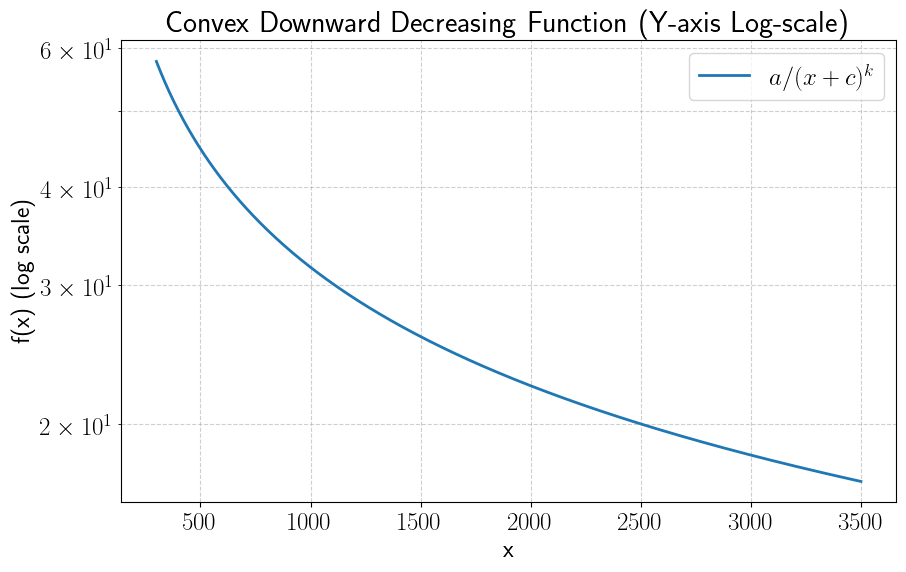

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(300, 3500, 1000)

# Convex downward (concave) decreasing function
def f_convex_down(x, a=1e3, c=0, k=0.5):
    return a / (x + c)**k

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, f_convex_down(x), linewidth=2, label=r'$a/(x+c)^k$')

plt.yscale('log')  # Y-axis in log scale
plt.xlabel('x')
plt.ylabel('f(x) (log scale)')
plt.title('Convex Downward Decreasing Function (Y-axis Log-scale)')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.show()


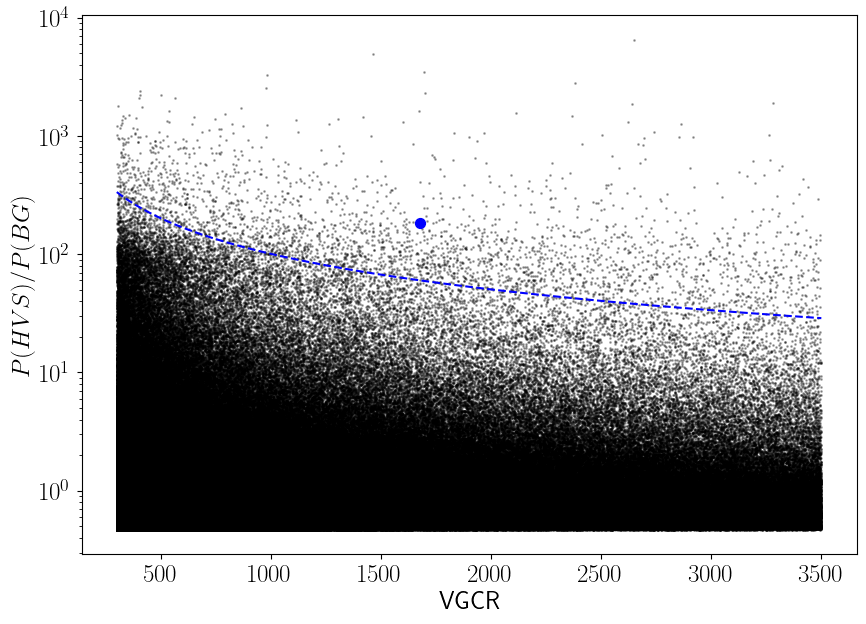

In [8]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates['VGCR'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.3)
# plot the S5HVS1
ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1)

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=1e5, c=0, k=0.999)# + 200
ax.plot(x, y, color='blue', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.show()

In [9]:
# selection of HVS candidates
candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=2.6e5, c=0, k=0.999)]
print(len(candidates_HL))

756


316


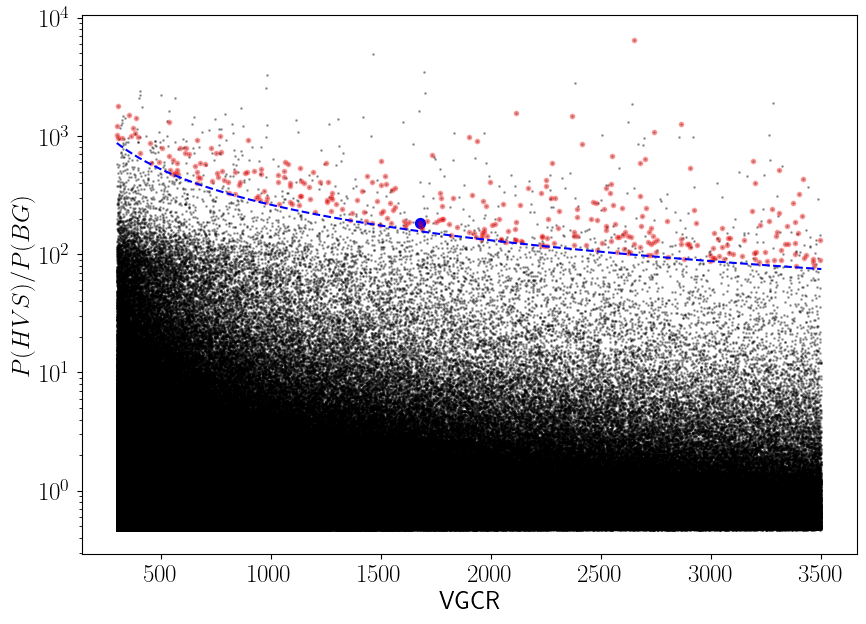

In [10]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates['VGCR'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.3)

# plot the S5HVS1
ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1)

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')
threshold_scale_factor = 2.6e5 # 2.6 to include down to S5HVS1

# selection of HVS candidates
candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=threshold_scale_factor, c=0, k=0.999)]
# remove the MW disk
candidates_HL = candidates_HL[(candidates_HL['b'] > 30) | (candidates_HL['b'] < -30)]
print(len(candidates_HL))

# selection
ax.scatter(candidates_HL['VGCR'], candidates_HL['p_hvs_over_bg'], c='red', s=10, alpha=0.3)

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=threshold_scale_factor, c=0, k=0.999)# + 200
ax.plot(x, y, color='blue', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.savefig(plot_dir + 'VGCR_vs_likelihood_ratio.png', dpi=300)
plt.show()

# Color dependant probability limit


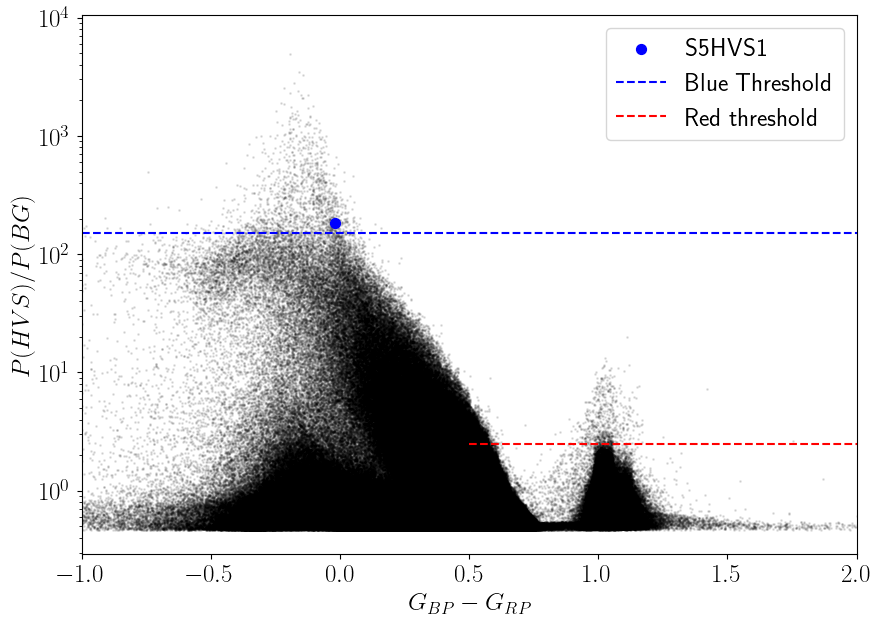

In [11]:
# plot bp_rp vs p_hvs_over_bg
fig, ax = plt.subplots()
ax.scatter(candidates['bp_rp_corr'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.1)
# plot the S5HVS1
ax.scatter(s5hvs1['bp_rp_corr'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1, label='S5HVS1')

# show limit on likelihood ratio
ax.axhline(150, color='blue', linestyle='--', label='Blue Threshold')
ax.axhline(2.5, color='red', linestyle='--', xmin= 0.5, xmax=1, label='Red threshold')
ax.set_yscale('log')
ax.set_xlabel('$G_{BP}-G_{RP}$')
ax.set_ylabel('$P(HVS)/P(BG)$')
ax.set_xlim(-1, 2)
ax.legend()
plt.savefig(plot_dir + 'bp_rp_vs_likelihood_ratio.png', dpi=300)

plt.show()

## Split stars between blue and red

In [12]:
# split the candidates in blue and red
candidates_blue = candidates[candidates['bp_rp_corr'] < 0.5] 
candidates_red = candidates[candidates['bp_rp_corr'] > 0.7]

# remove the MW disk
candidates_blue = candidates_blue[(candidates_blue['b'] > 30) | (candidates_blue['b'] < -30)]
candidates_red = candidates_red[(candidates_red['b'] > 30) | (candidates_red['b'] < -30)]

# remove sources close to the LMC and SMC
lmc_skycoord = SkyCoord(ra=80.89416667*u.deg, dec=-69.75611111*u.deg, frame='icrs')
smc_skycoord = SkyCoord(ra=13.18666667*u.deg, dec=-72.82861111*u.deg, frame='icrs')

# define 
candidates_blue_skycoord = SkyCoord(ra=candidates_blue['ra']*u.deg, dec=candidates_blue['dec']*u.deg, frame='icrs')
candidates_red_skycoord = SkyCoord(ra=candidates_red['ra']*u.deg, dec=candidates_red['dec']*u.deg, frame='icrs')

# compute the angular separation
sep_lmc_blue = candidates_blue_skycoord.separation(lmc_skycoord)
sep_smc_blue = candidates_blue_skycoord.separation(smc_skycoord)
sep_lmc_red = candidates_red_skycoord.separation(lmc_skycoord)
sep_smc_red = candidates_red_skycoord.separation(smc_skycoord)

# remove sources close to the LMC and SMC
candidates_blue = candidates_blue[(sep_lmc_blue > 10*u.deg) & (sep_smc_blue > 5*u.deg)]
candidates_red = candidates_red[(sep_lmc_red > 10*u.deg) & (sep_smc_red > 5*u.deg)]

# select the high likelihood candidates
candidates_HL_blue = candidates_blue[candidates_blue['p_hvs_over_bg'] > 150]
candidates_HL_red = candidates_red[candidates_red['p_hvs_over_bg'] > 2.5]

# select those that are observable from the south
candidates_HL_blue = candidates_HL_blue[candidates_HL_blue['dec'] < 0]
candidates_HL_red = candidates_HL_red[candidates_HL_red['dec'] < 0]

print(len(candidates_HL_blue))
print(len(candidates_HL_red))


424
76


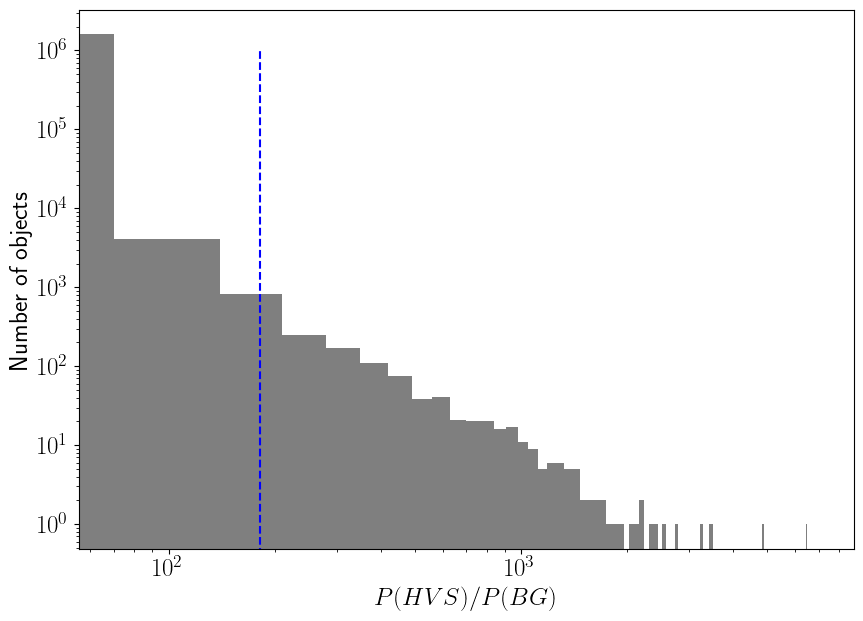

In [244]:
# histogram of p_hvs_over_bg
fig, ax = plt.subplots()
ax.hist(candidates['p_hvs_over_bg'][candidates['p_hvs_over_bg']<1e9], bins=100, color='black', alpha=0.5, range=(0, 7000), log=True)
ax.vlines(s5hvs1['p_hvs_over_bg'], 0, 1e6, color='blue', linestyle='--')
#ax.hist(candidates_HL['p_hvs_over_bg'], bins=100, color='red', alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('$P(HVS)/P(BG)$')
ax.set_ylabel('Number of objects')
plt.show()

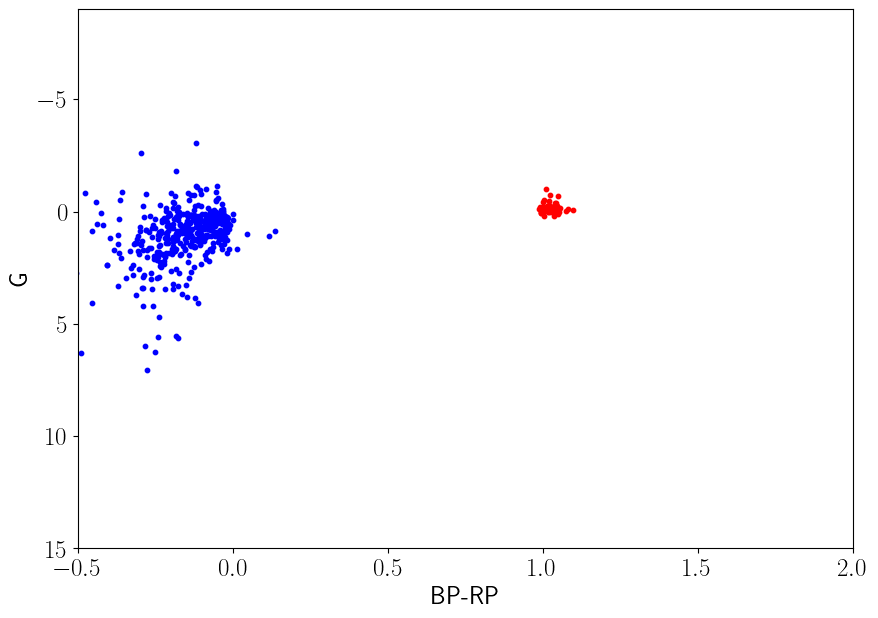

In [13]:
from matplotlib.colors import LogNorm

# selection of HVS candidates
#candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=threshold_scale_factor, c=0, k=0.999)]
#candidates_HL = candidates[candidates['p_hvs_over_bg'] > 130]
# remove the MW disk
#candidates_HL = candidates_HL[(candidates_HL['b'] > 20) | (candidates_HL['b'] < -20)]
#print(len(candidates_HL))

# plot CMD
fig, ax = plt.subplots()
#bg_s = ax.scatter(candidates['bp_rp_corr'], candidates['implied_M_g_corr'], c=candidates['p_hvs_over_bg'], s=1, alpha=0.3, cmap='viridis', norm=LogNorm(vmin=1, vmax=1000))
ax.scatter(candidates_HL_blue['bp_rp_corr'], candidates_HL_blue['implied_M_g_corr'], c='blue', s=10, alpha=1)
ax.scatter(candidates_HL_red['bp_rp_corr'], candidates_HL_red['implied_M_g_corr'], c='red', s=10, alpha=1)

plt.gca().invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')
ax.set_xlim(-0.5, 2)
ax.set_ylim(15, -9)
#plt.colorbar(bg_s, label='$P(HVS)/P(BG)$')
plt.show()

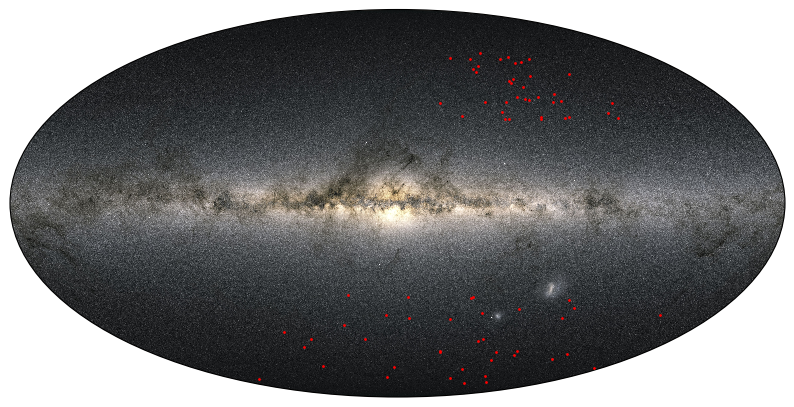

In [259]:
# mollwide plot
#fig, ax = plt.subplots(figsize=(10, 7))
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
#m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
#m.scatter(s5hvs1['l'], s5hvs1['b'], s=50, c='blue', alpha=1)
plt.savefig(os.path.join(plot_dir,'HVS_candidates_mollwide_red.png'), dpi=300)
plt.show()


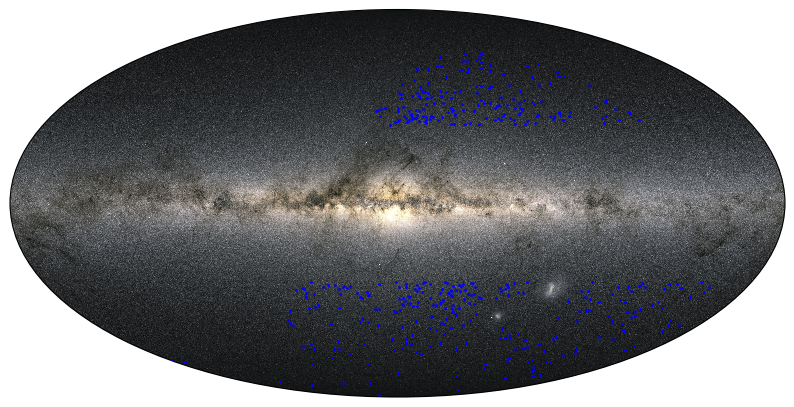

In [263]:
# mollwide plot
#fig, ax = plt.subplots(figsize=(10, 7))
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
#m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
#m.scatter(s5hvs1['l'], s5hvs1['b'], s=50, c='blue', alpha=1)
plt.savefig(os.path.join('HVS_candidates_mollwide_blue.png'), dpi=300)
plt.show()


In [ ]:
# mollwide plot
#fig, ax = plt.subplots(figsize=(10, 7))
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
m.scatter(s5hvs1['ra']*u.deg, s5hvs1['dec']*u.deg, s=50, c='yellow', alpha=1, label='S5-HVS1')
plt.legend()
plt.savefig(os.path.join('HVS_candidates_mollwide_both.png'), dpi=300)
plt.show()


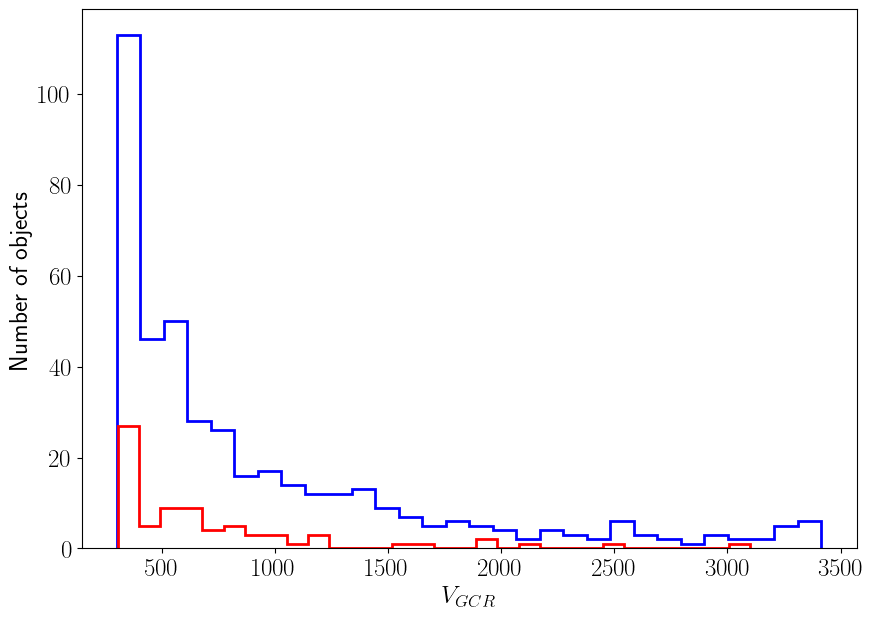

In [257]:
# VGCR histogram

fig, ax = plt.subplots()
ax.hist(candidates_HL_blue['VGCR'], bins=30, color='blue', histtype='step', linewidth=2)
#ax.hist(s5hvs1['VGCR'], bins=100, color='blue', histtype='step', linewidth=2)
ax.hist(candidates_HL_red['VGCR'], bins=30, color='red', histtype='step', linewidth=2)
ax.set_xlabel('$V_{GCR}$')
ax.set_ylabel('Number of objects')
plt.show()

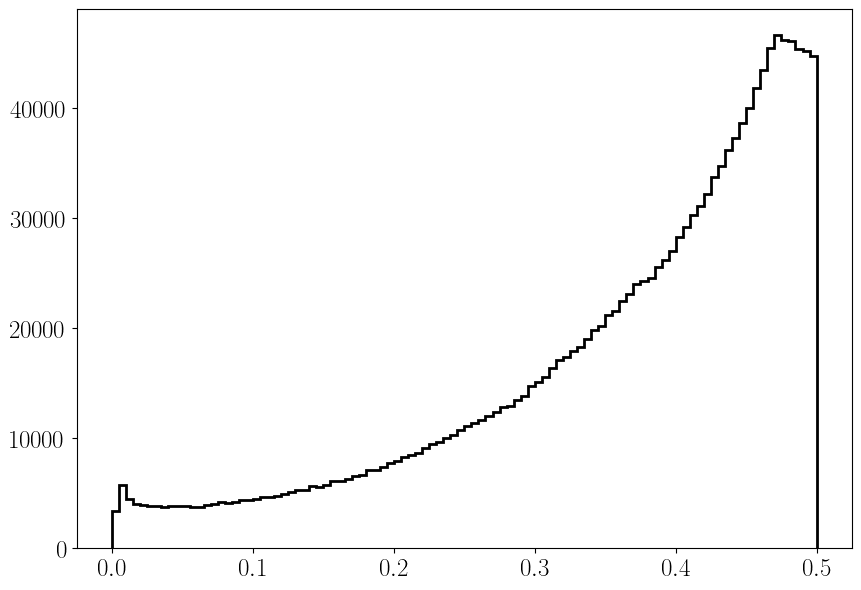

In [149]:
# VGCR histogram

fig, ax = plt.subplots()
ax.hist(candidates['p_background'], bins=100, color='black', histtype='step', linewidth=2)
#ax.hist(s5hvs1['VGCR'], bins=100, color='blue', histtype='step', linewidth=2)
plt.show()